# **Multi Qubit Qunatum Gates**

#### Below we will introduce some two-qubit and three-qubit gates.

## Basic Qiskit Information

- All qubits in qiskit starts from the state |0> by default.
- Qiskit's counting the qubits is the opposite of our counting, i.e. the counting starts from the right side. For example in |10>, qiskit consideres the 1st qubit is |0> and the 2nd one is |1>.

#### Importuing the necessary libraries:

In [1]:
import qiskit
import numpy as np
from qiskit_aer import Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_state_city # Density Matrix Plot
from qiskit.visualization import plot_state_qsphere # Used for Multi Qubit Visualization
from qiskit.visualization import plot_bloch_multivector # Plotting the Bloch Sphere for Single Qubits
from qiskit.visualization import plot_histogram # 2D Histogram
from math import pi, sqrt # pi = 3.14 and square root operation

## **1. Two-Qubit Gates**
## 1.1. Quantum $CNOT$/$CX$ Gate
#### The CNOT gate (Controlled-NOT gate), also called the CX gate, is the first two-qubit gate that we introduce here. It performs a conditional operations that it flips the target qubit if and only if the control qubit is in the $\ket 1$ state. The CNOT gate is essential for creating entanglement between qubits and is a fundamental gate in quantum computing.

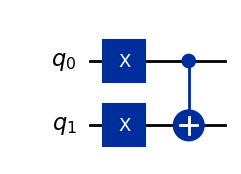

In [11]:
qc_cx = QuantumCircuit(2, name= "qc")
# to get the |11> state, since the intial default of qubit is |00>, we flip the qubits by applying X gate.
qc_cx.x(0)
qc_cx.x(1)
# apply CNOT gate
qc_cx.cx(0,1)
# visiualize the circuit
qc_cx.draw('mpl')

#### **Density Matrix Plot for CNOT Gate**
#### To display the density matrix of a quantum state ($\rho = \ket\psi\bra\psi$ where $\ket\psi$ is the state of the qubit) in Qiskit, we use **plot_state_city**. 


Quantum state is: Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


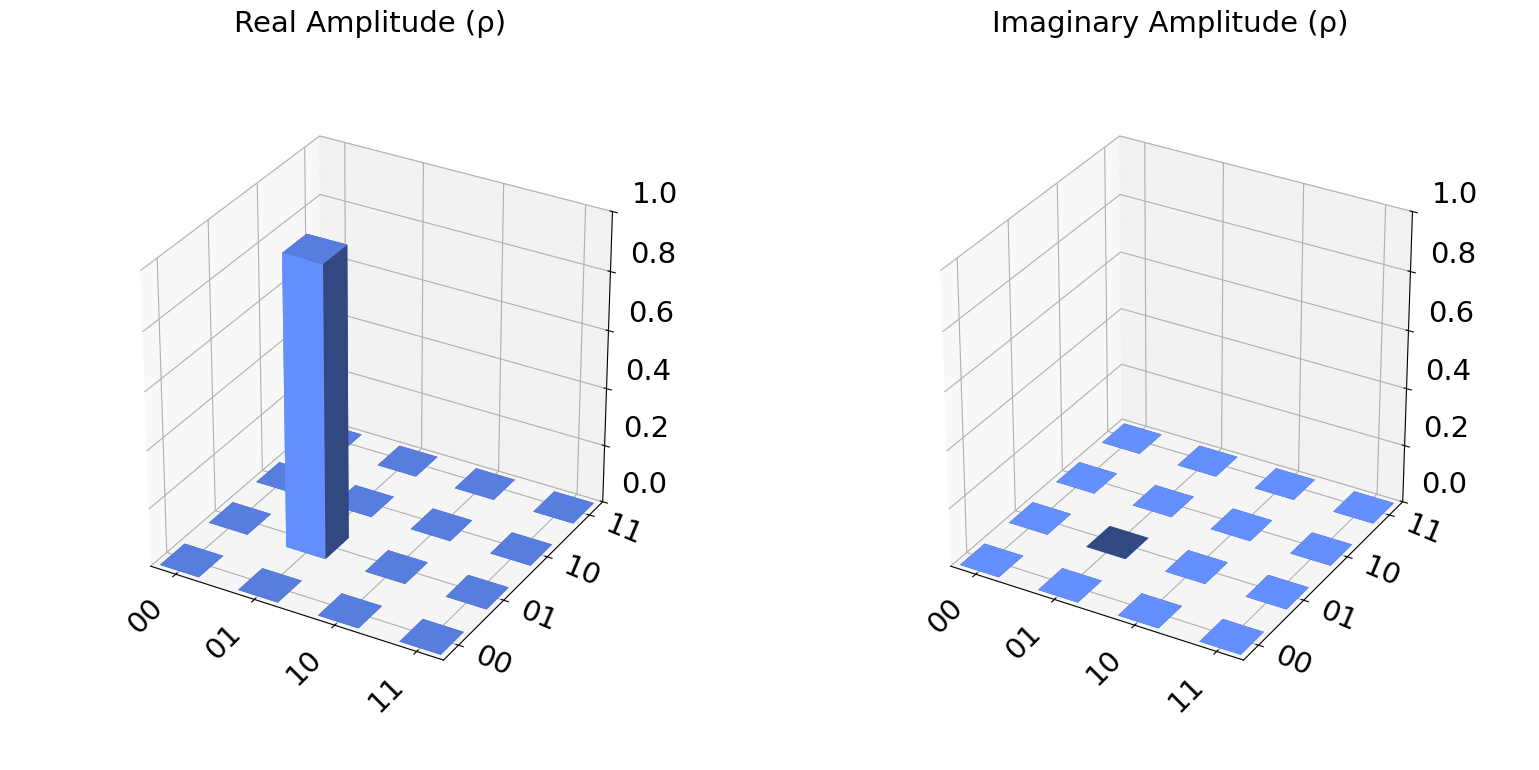

In [12]:
#initiation
estimator = Aer.get_backend('statevector_simulator')

#run
job = estimator.run(qc_cx)

# get the eigenvector after passing through the gates
psi= job.result().get_statevector(qc_cx)


# Printing the final state after passing through the gates
print("\nQuantum state is:",psi)

# ploting density matrix
plot_state_city(psi)

#### The Bloch sphere visualizes the single qubit state. To visualize the state of a multi-qubit system, Qiskit introduces **qsphere**. The qsphere represents both the magnitude (probability amplitude) and the phase of each possible computational basis state in an intuitive way.  In the qsphere, the size of the points is proportional to the magnitude of the corresponding term in the state and the color represents the phase.

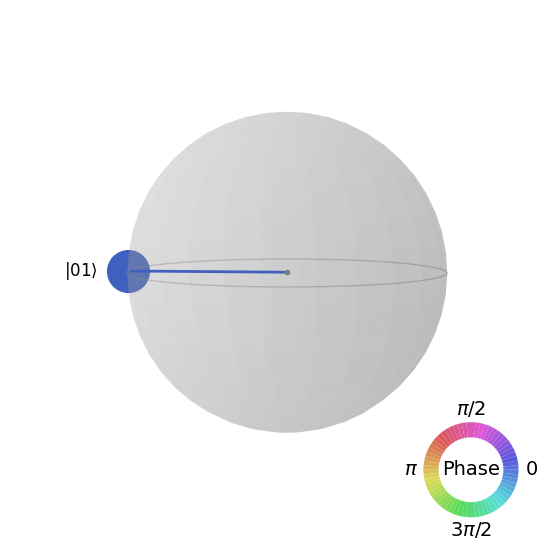

In [13]:
plot_state_qsphere(psi)

#### According to this visualization, the state of the two qubits is $\ket{01}$ and there is no phase shift, in agreement with statevector obtained in above code line.

In [14]:
# initiate
estimator = Aer.get_backend("unitary_simulator")

# run
job = estimator.run(qc_cx)

# result
job.result().get_unitary(qc_cx)

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


#### This is the matrix form of the gates applied to the qubits respectively: $CNOT . X_2 . X_1$.

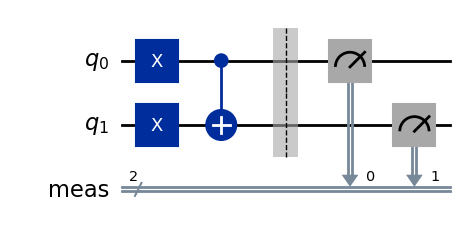

In [7]:
# measurement on both qubits
qc_cx.measure_all()
qc_cx.draw('mpl')

Total counts are: {'01': 1000}


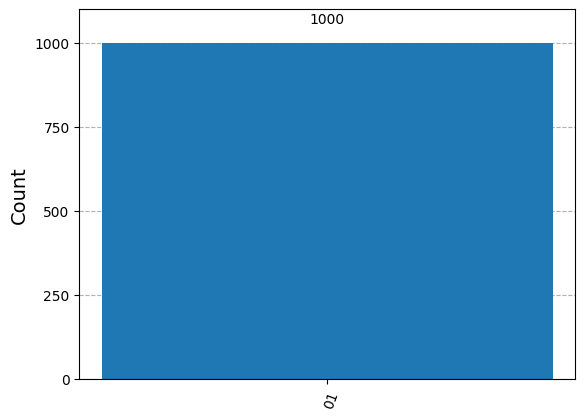

In [8]:
# plot probabilty
# initiate
estimator = Aer.get_backend('qasm_simulator')

# run
job = estimator.run(qc_cx , shots = 1000) # shots is the number of measurements

# get the result fo 1000 times measurment
counts= job.result().get_counts(qc_cx)
print("Total counts are:", counts)

plot_histogram(counts)

#### To reproduce the $CNOT$ gate, one can apply two Hadamard and one $CZ$ gates, as shown below.

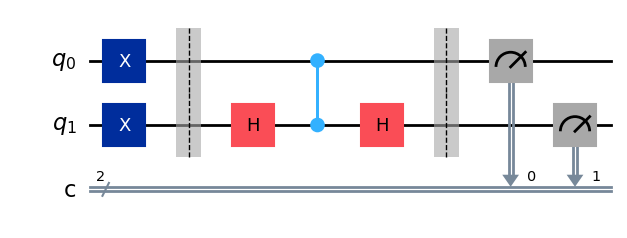

In [8]:
qc_cx = QuantumCircuit(2,2,name = 'qc')
qc_cx.x(0)
qc_cx.x(1)
qc_cx.barrier()
qc_cx.h(1)
qc_cx.cz(0,1)
qc_cx.h(1)
qc_cx.barrier()
qc_cx.measure([0,1], [0,1])
qc_cx.draw('mpl')

## 1.2. Quantum $CZ$ Gate
#### The $CZ$ gate (Controlled-$Z$ gate) is another two-qubit gate that applies a Pauli-Z gate to the target qubit if and only if the control qubit is in the $\ket 1$ state.

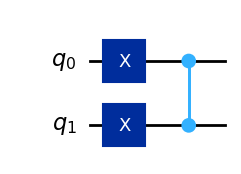

In [9]:
qc_cz = QuantumCircuit(2, name = 'qc')
# to get the |11> state, since the intial default of qubit is |00>, we flip the qubits by applying X gate.
qc_cz.x(0)
qc_cz.x(1)
qc_cz.cz(0,1)
qc_cz.draw('mpl')

### **Density Matrix Plot for $CZ$ Gate**


Quantum state is: Statevector([ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j],
            dims=(2, 2))


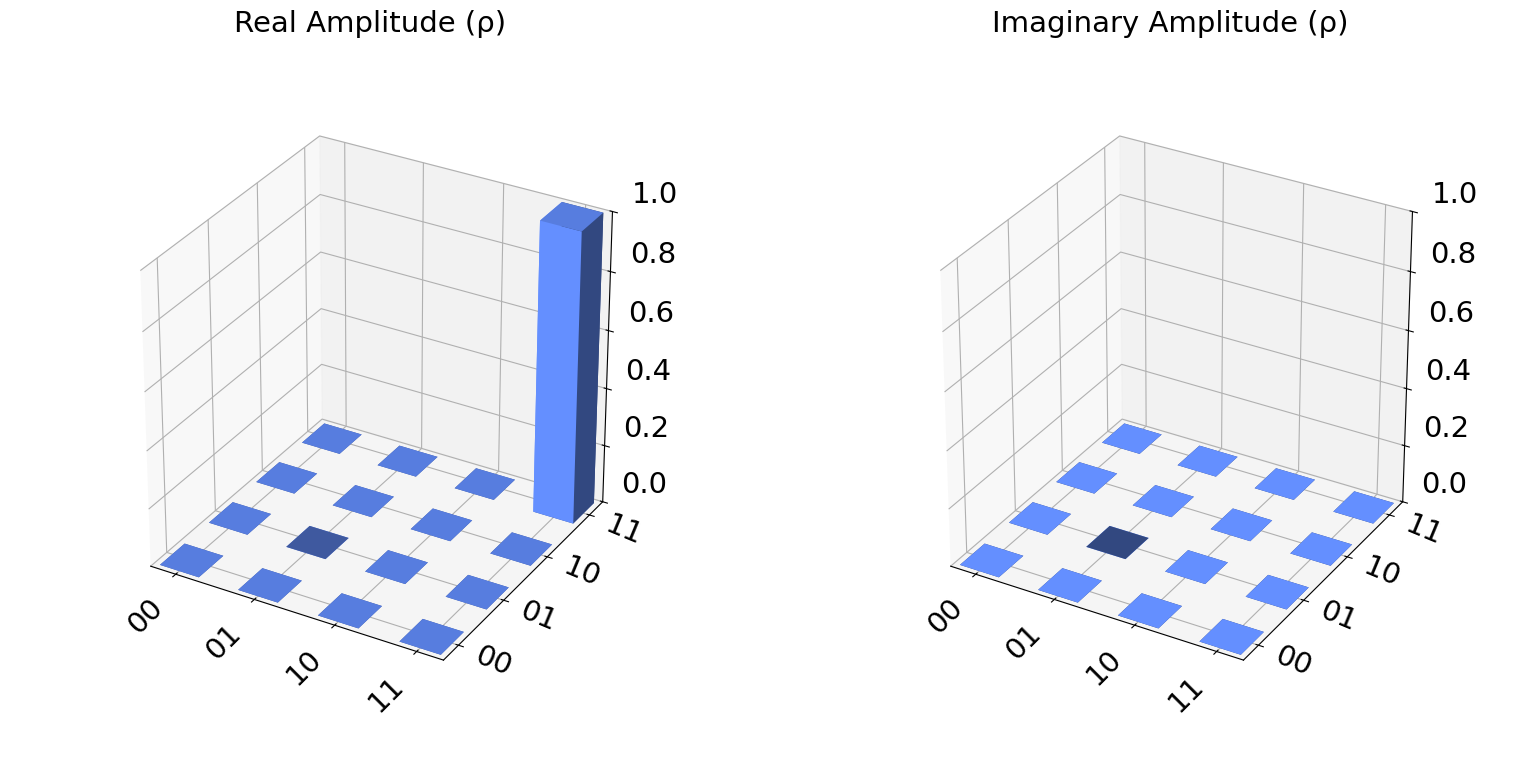

In [10]:
#initiation
estimator = Aer.get_backend('statevector_simulator')

#run
job = estimator.run(qc_cz)

# get the eigenvector after passing through the gates
psi= job.result().get_statevector(qc_cz)


# Printing the state after passing through the gates
print("\nQuantum state is:",psi)

# ploting density matrix
plot_state_city(psi)

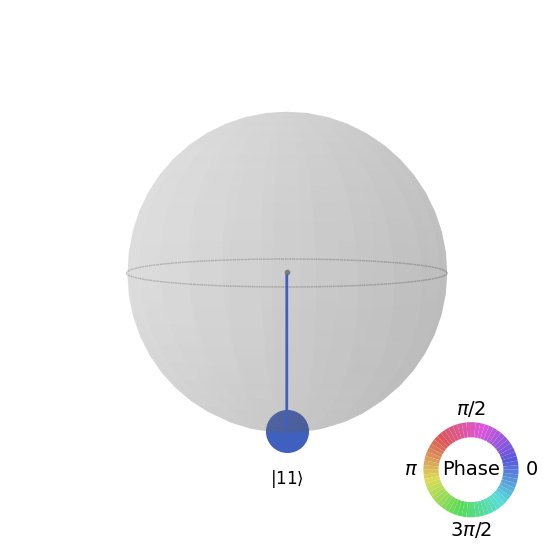

In [11]:
# visualize the statevector in qsphere
plot_state_qsphere(psi)

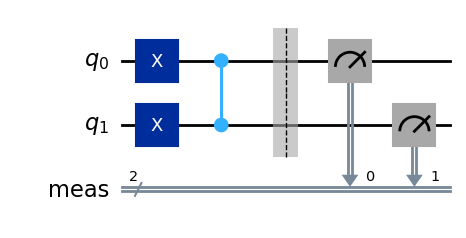

In [12]:
# measurement
qc_cz.measure_all()
qc_cz.draw('mpl')

Total counts are: {'11': 1000}


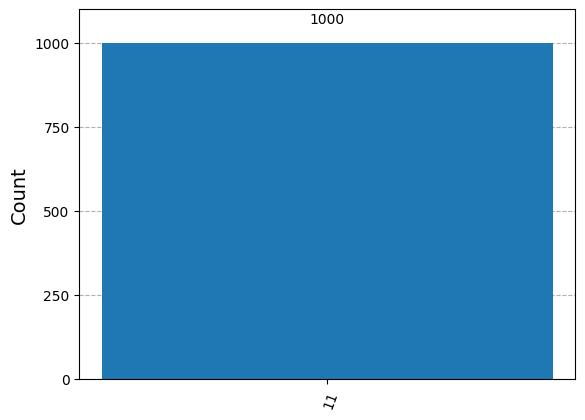

In [13]:
# plot probabilty
# initiate
estimator = Aer.get_backend('qasm_simulator')

# run
job = estimator.run(qc_cz , shots = 1000) # shots is the number of measurements

# get the result fo 1000 times measurment
counts= job.result().get_counts(qc_cz)
print("Total counts are:", counts)

plot_histogram(counts)

#### To reproduc the $CZ$ gate one can use the two Hadamard and one CNOT gates as shown bellow.

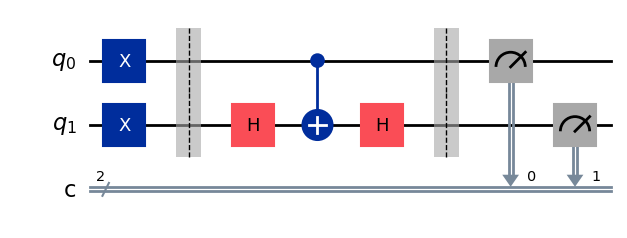

In [14]:
qc_cz = QuantumCircuit(2,2,name = 'qc')
qc_cz.x(0)
qc_cz.x(1)
qc_cz.barrier()
qc_cz.h(1)
qc_cz.cx(0,1)
qc_cz.h(1)
qc_cz.barrier()
qc_cz.measure([0,1], [0,1])
qc_cz.draw('mpl')

Total counts are: {'11': 1000}


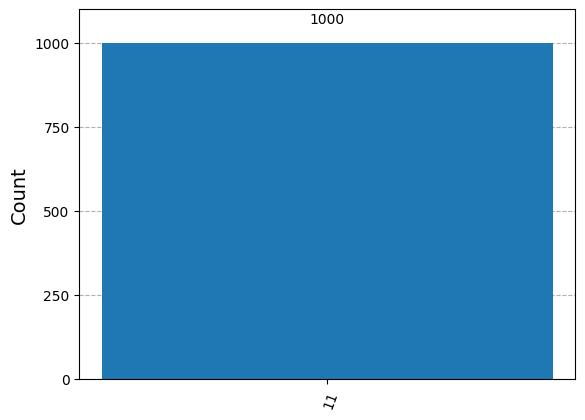

In [15]:
# plot probabilty
# initiate
estimator = Aer.get_backend('qasm_simulator')

# run
job = estimator.run(qc_cz , shots = 1000) # shots is the number of measurements

# get the result fo 1000 times measurment
counts= job.result().get_counts(qc_cz)
print("Total counts are:", counts)

plot_histogram(counts)

## 1.3. Quantum $CH$ Gate
#### The quantum $CH$ (Controlled-Hadamard) gate is a two-qubit gate where a Hadamard gate is applied to the target qubit only if the control qubit is in the $\ket 1$.

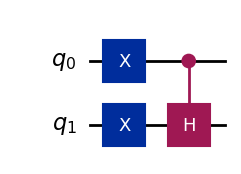

In [11]:
qc_ch = QuantumCircuit(2, name = 'qc')
# to get the |11> state, since the intial default of qubit is |00>, we flip the qubits by applying X gate.
qc_ch.x(0)
qc_ch.x(1)
qc_ch.ch(0,1)
qc_ch.draw('mpl')

### **Density Matrix Plot for $CH$ Gate**


Quantum state is: Statevector([-0.   +0.j,  0.707-0.j,  0.   -0.j, -0.707+0.j],
            dims=(2, 2))


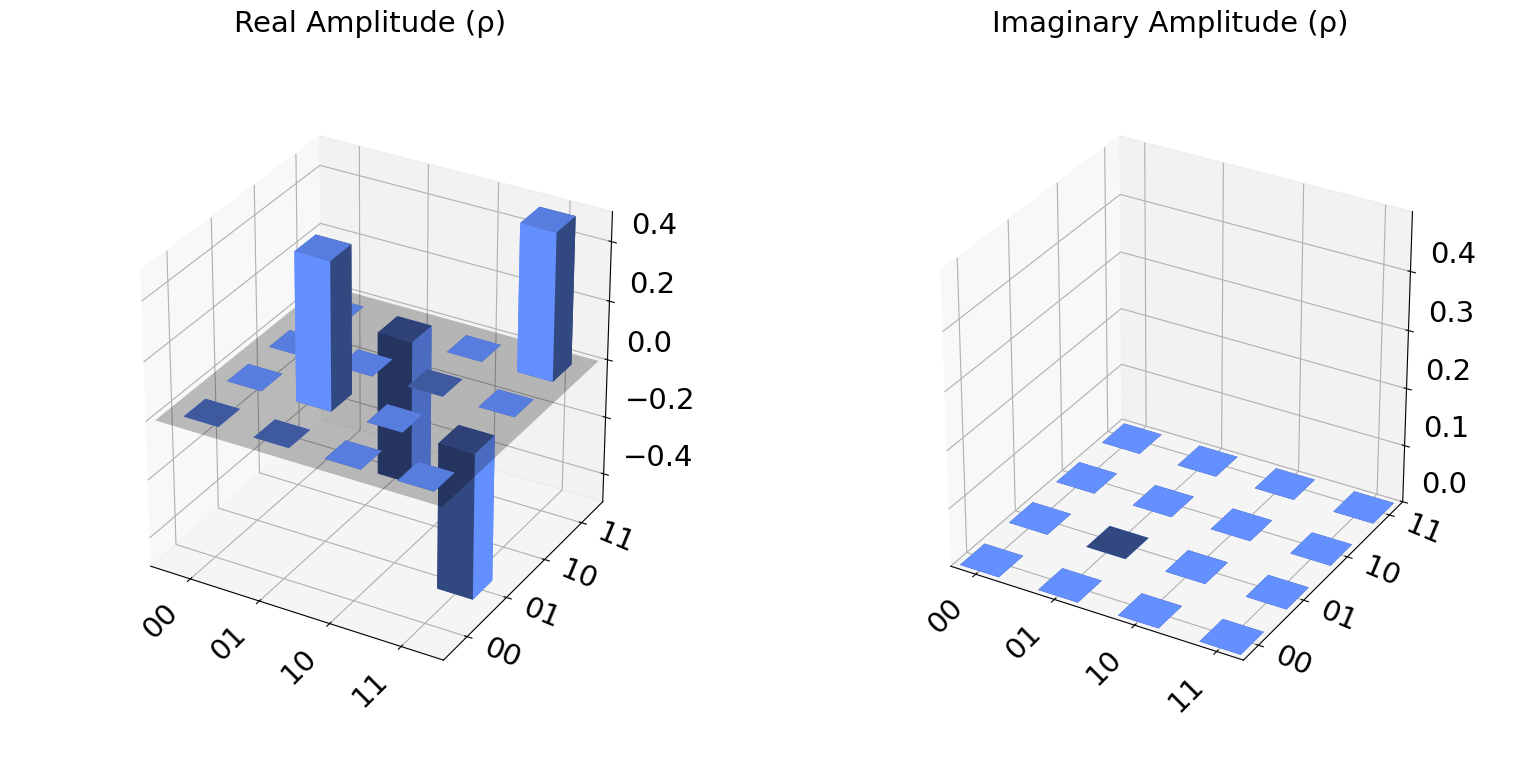

In [13]:
#initiation
estimator = Aer.get_backend('statevector_simulator')

#run
job = estimator.run(qc_ch.decompose(reps=6)) # we must use .decompose on a circuit to decompose it into simpler gates before running it on a simulator, otherwise it is not working
# reps is the number of times the circuit will be decomposed

# get the eigenvector after passing through the gates
psi= job.result().get_statevector(qc_ch, decimals = 3)


# Printing the state after passing through the gates
print("\nQuantum state is:", psi)

# ploting density matrix
plot_state_city(psi)


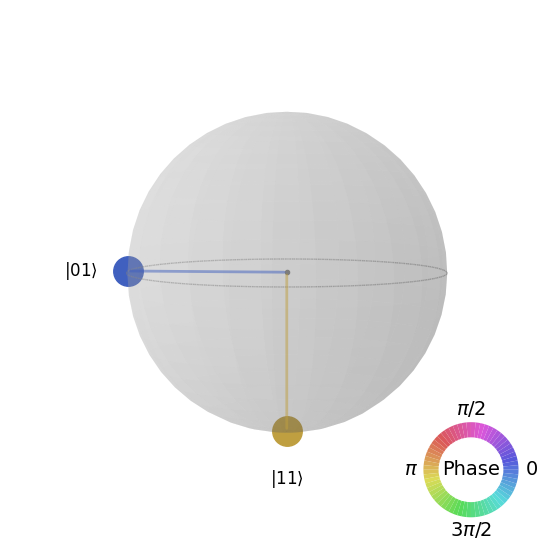

In [18]:
# visualize the statevector in qsphere
plot_state_qsphere(psi)

In [19]:
# initiate
estimator = Aer.get_backend("unitary_simulator")

# run
job = estimator.run(qc_ch.decompose(reps=6))

# result
job.result().get_unitary(qc_ch, decimals=3)

Operator([[-0.   +0.j,  0.   -0.j,  0.   -0.j,  1.   -0.j],
          [ 0.707-0.j, -0.   +0.j,  0.707-0.j, -0.   +0.j],
          [ 0.   -0.j,  1.   -0.j, -0.   -0.j,  0.   +0.j],
          [-0.707+0.j,  0.   -0.j,  0.707+0.j, -0.   +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


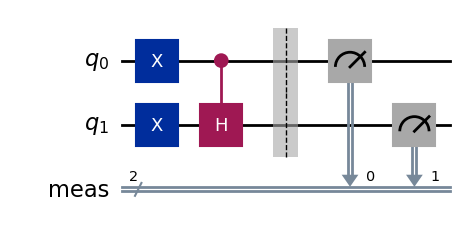

In [20]:
qc_ch.measure_all()
qc_ch.draw('mpl')

Total counts are: {'11': 518, '01': 482}


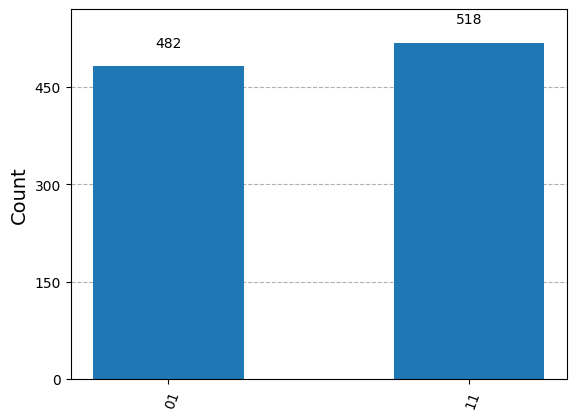

In [21]:
# plot probabilty
# initiate
estimator = Aer.get_backend('qasm_simulator')

# run
job = estimator.run(qc_ch.decompose(reps=6) , shots = 1000) # shots is the number of measurements

# get the result fo 1000 times measurment
counts= job.result().get_counts(qc_ch)
print("Total counts are:", counts)

plot_histogram(counts)

#### To reproduce the CH gate, we can apply $CNOT$ & $R_y$ gates as shown bellow.

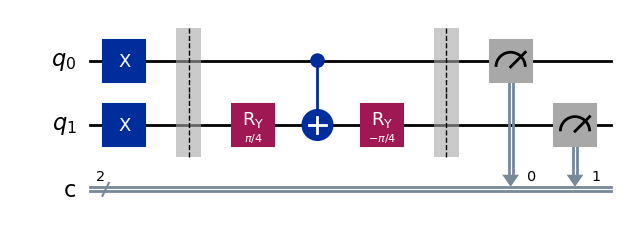

In [22]:
# CH-gate on |11> 
qc_ch = QuantumCircuit(2,2,name="qc")
qc_ch.x(0) # X Gate on 1st Qubit
qc_ch.x(1) # X Gate on 2nd Qubit
qc_ch.barrier()
qc_ch.ry(pi/4,1) # Ry Gate on 2nd Qubit
qc_ch.cx(0,1) # CNOT Gate
qc_ch.ry(-pi/4,1) # Ry Gate on 2nd Qubit
qc_ch.barrier()
qc_ch.measure([0,1],[0,1])
qc_ch.draw('mpl')

Total counts are: {'11': 505, '01': 495}


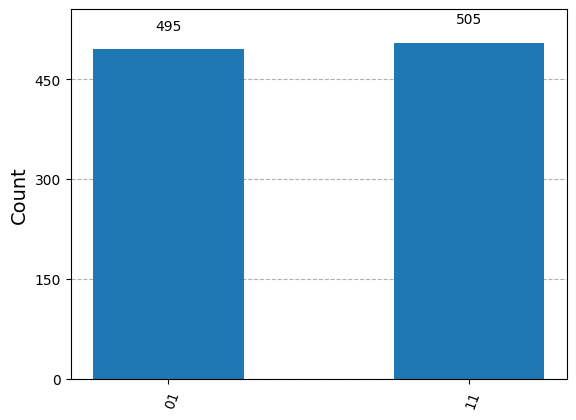

In [23]:
# plot probabilty
# initiate
estimator = Aer.get_backend('qasm_simulator')

# run
job = estimator.run(qc_ch.decompose(reps=6) , shots = 1000) # shots is the number of measurements

# get the result fo 1000 times measurment
counts= job.result().get_counts(qc_ch)
print("Total counts are:", counts)

plot_histogram(counts)

## 1.4. Quantum SWAP Gate
#### The Quantum SWAP gate is another two-qubit gate that swaps the states of two qubits.  

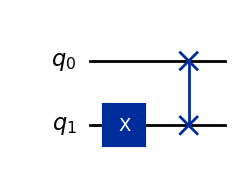

In [2]:
# prepare the initial state as |10> and swap it to get |01> ( in qiskit ordering starts from the right side)
qc_swap = QuantumCircuit(2, name = 'qc')
qc_swap.x(1)
qc_swap.swap(0,1)
qc_swap.draw('mpl')

### **Density Matrix Plot for SWAP Gate**


Quantum state is: 


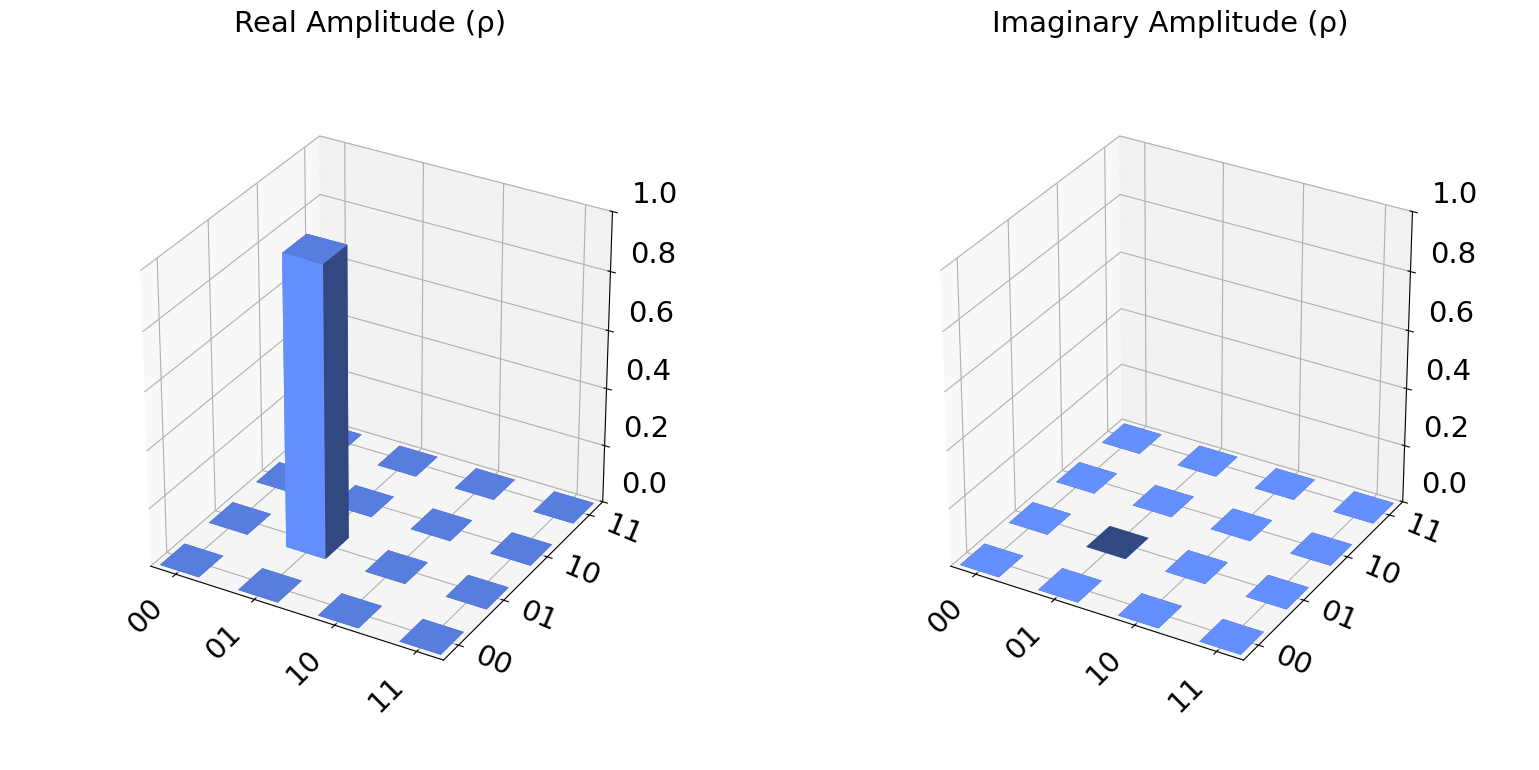

In [3]:
# initiate
estimator = Aer.get_backend('statevector_simulator')

# run
job = estimator.run(qc_swap)

# the final state after passing through the gates
psi = job.result().get_statevector(qc_swap)

print("\nQuantum state is: ")

#density of states
plot_state_city(psi)

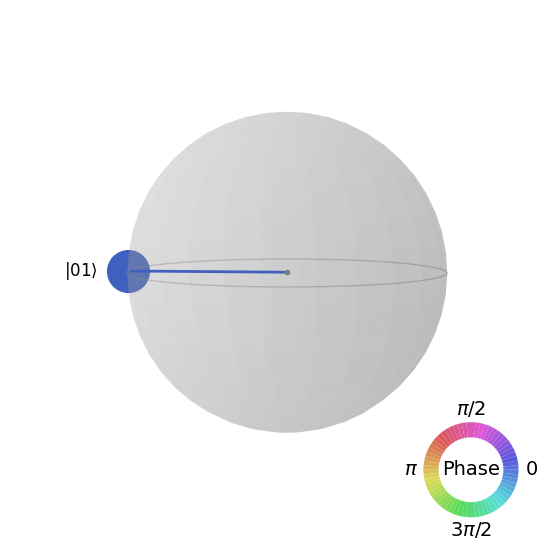

In [4]:
# visualize the statevector in qsphere
plot_state_qsphere(psi)

In [5]:
# initiate
estimator = Aer.get_backend("unitary_simulator")

# run
job = estimator.run(qc_swap.decompose(reps=6))

# result
job.result().get_unitary(qc_swap, decimals=3)

Operator([[ 0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j],
          [ 1.+0.j,  0.+0.j, -0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  1.-0.j],
          [ 0.+0.j,  1.+0.j,  0.+0.j, -0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


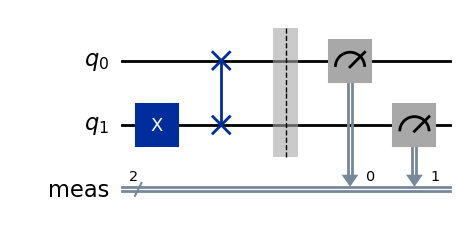

In [6]:
qc_swap.measure_all()
qc_swap.draw('mpl')

Total counts are: {'01': 1000}


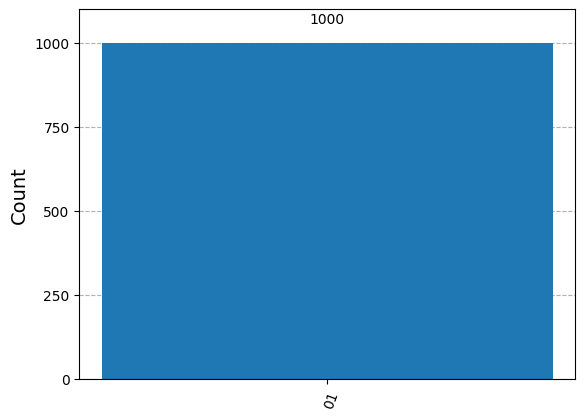

In [7]:
# plot probabilty
# initiate
estimator = Aer.get_backend('qasm_simulator')

# run
job = estimator.run(qc_swap.decompose(reps=6) , shots = 1000) # shots is the number of measurements

# get the result fo 1000 times measurment
counts= job.result().get_counts(qc_swap)
print("Total counts are:", counts)

plot_histogram(counts)

#### There are two different approaches that applies the $CNOT$ gates sequentially to give the equivalent results as SWAP Gate: 
#### **I. First approach of reproducing SWAP gate**

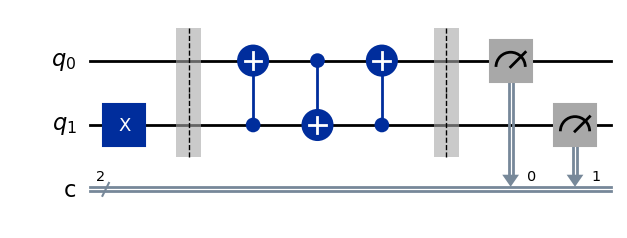

In [30]:
qc_swap = QuantumCircuit(2,2,name="qc")
qc_swap.x(1) # X Gate on 2nd Qubit
qc_swap.barrier()
qc_swap.cx(1,0) # CNOT gate: 2nd qubit isthe control and the 1st qubit is the target
qc_swap.cx(0,1) # CNOT gate: 1st qubit isthe control and the 2nd qubit is the target
qc_swap.cx(1,0) # CNOT gate: 2nd qubit isthe control and the 1st qubit is the target
qc_swap.barrier()
qc_swap.measure([0,1],[0,1])
qc_swap.draw('mpl')

Total counts are: {'01': 1000}


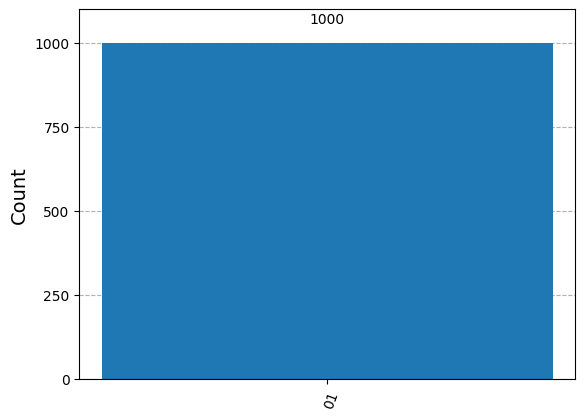

In [31]:
# plot probabilty
# initiate
estimator = Aer.get_backend('qasm_simulator')

# run
job = estimator.run(qc_swap.decompose(reps=6) , shots = 1000) # shots is the number of measurements

# get the result fo 1000 times measurment
counts= job.result().get_counts(qc_swap)
print("Total counts are:", counts)

plot_histogram(counts)

#### **II. Second approach of reproducing SWAP gate**

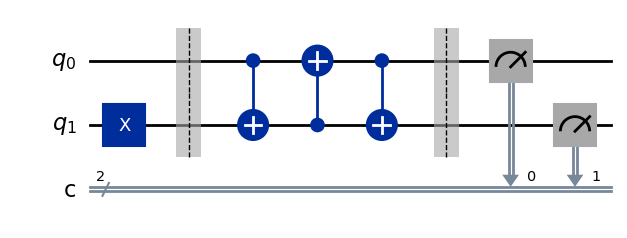

In [32]:
qc_swap = QuantumCircuit(2,2,name="qc")
qc_swap.x(1) # X Gate on 2nd Qubit
qc_swap.barrier()
qc_swap.cx(0,1) # CNOT gate: 2nd qubit isthe control and the 1st qubit is the target
qc_swap.cx(1,0) # CNOT gate: 1st qubit isthe control and the 2nd qubit is the target
qc_swap.cx(0,1) # CNOT gate: 2nd qubit isthe control and the 1st qubit is the target
qc_swap.barrier()
qc_swap.measure([0,1],[0,1])
qc_swap.draw('mpl')

Total counts are: {'01': 1000}


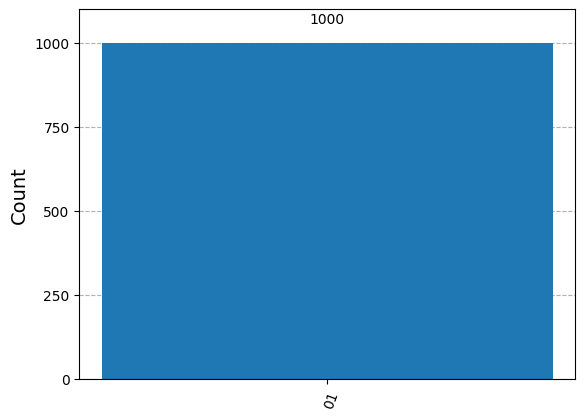

In [33]:
# plot probabilty
# initiate
estimator = Aer.get_backend('qasm_simulator')

# run
job = estimator.run(qc_swap.decompose(reps=6) , shots = 1000) # shots is the number of measurements

# get the result fo 1000 times measurment
counts= job.result().get_counts(qc_swap)
print("Total counts are:", counts)

plot_histogram(counts)

## 1.5. Creating Bell States
#### Bell states (also known as EPR pairs) are specific quantum states of two qubits that are maximally entangled. 
$$
\begin{align}
|\Phi^+\rangle &= \frac{|00\rangle + |11\rangle}{\sqrt{2}} \nonumber\\
|\Phi^-\rangle &= \frac{|00\rangle - |11\rangle}{\sqrt{2}} \nonumber\\
|\Psi^+\rangle &= \frac{|01\rangle + |10\rangle}{\sqrt{2}} \nonumber\\
|\Psi^-\rangle &= \frac{|01\rangle - |10\rangle}{\sqrt{2}} \nonumber
\end{align}
$$

#### We can apply some quantum gates to the initial state of the two-qubit state $\ket{00}$ to create one of the above Bell states. Here, we creat $\Phi^+$ 

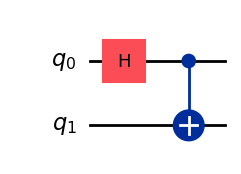

In [4]:
qc_bell = QuantumCircuit(2,name = 'qc')
qc_bell.h(0)
qc_bell.cx(0,1)
qc_bell.draw('mpl')

### **Density Matrix Plot for Bell state**


Quantum statevector is: Statevector([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.707+0.j],
            dims=(2, 2))


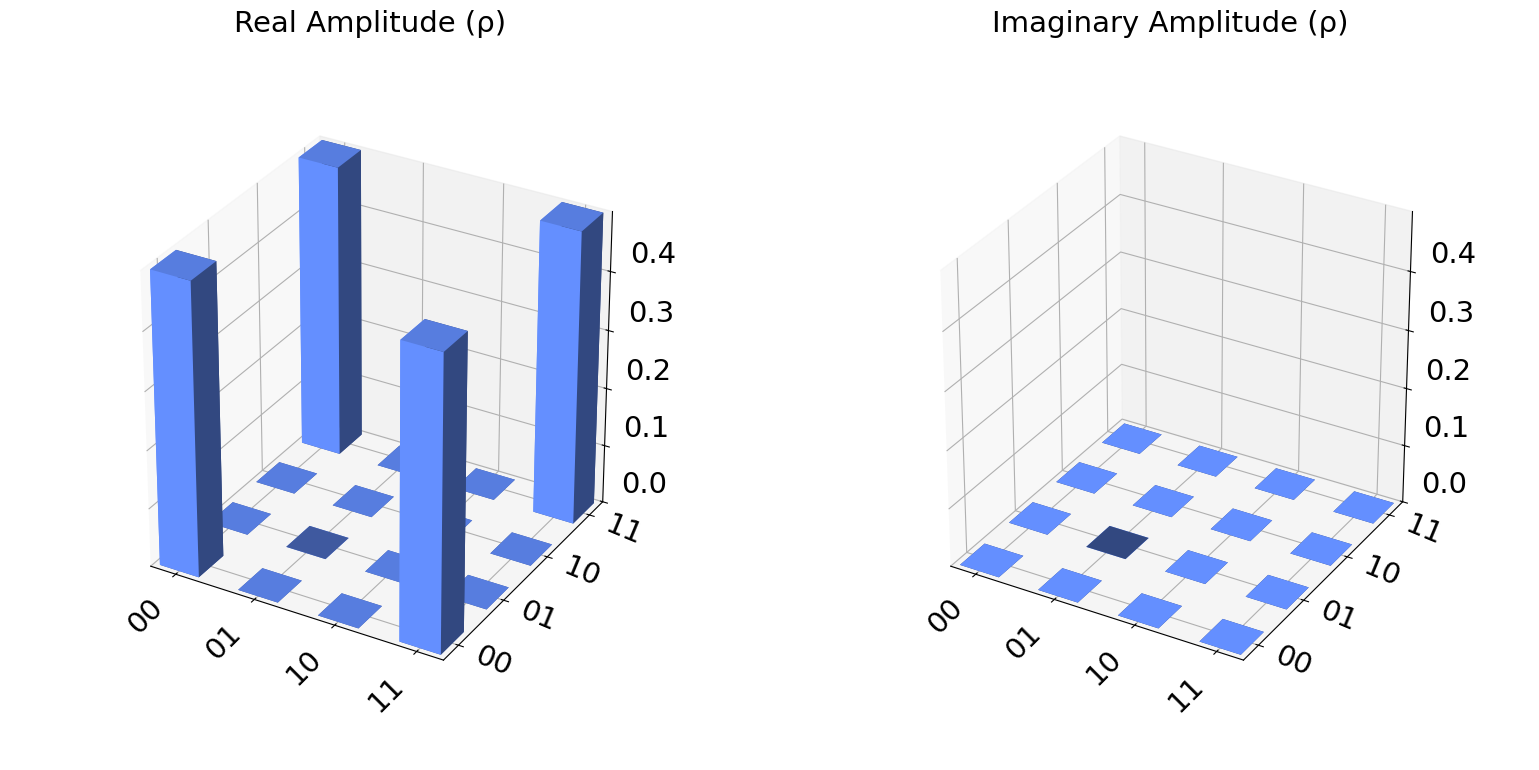

In [5]:
estimator = Aer.get_backend('statevector_simulator')

# run
job = estimator.run(qc_bell)

# the final state after passing through the gates
psi = job.result().get_statevector(qc_bell, decimals = 3)

print('\nQuantum statevector is:' , psi)

plot_state_city(psi)

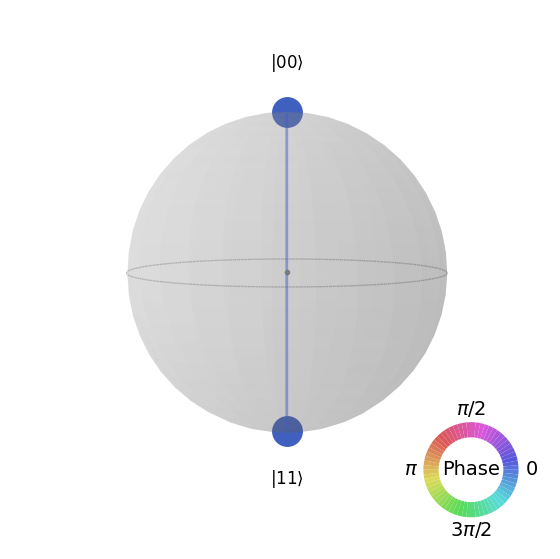

In [37]:
# visualize the statevector in qsphere
plot_state_qsphere(psi)

In [6]:
# initiate
estimator = Aer.get_backend('unitary_simulator')

# run
job = estimator.run(qc_bell)

# result
job.result().get_unitary(qc_bell, decimals = 3)


Operator([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j],
          [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


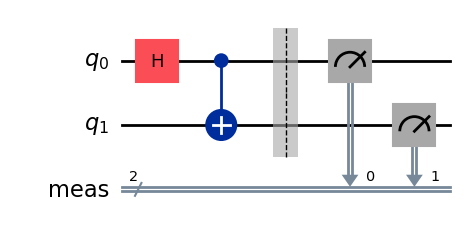

In [39]:
qc_bell.measure_all()
qc_bell.draw('mpl')

Total counts are: {'11': 517, '00': 483}


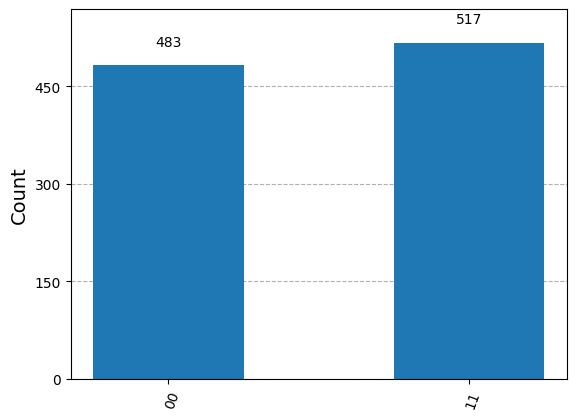

In [40]:
# plot probabilty
# initiate
estimator = Aer.get_backend('qasm_simulator')

# run
job = estimator.run(qc_bell , shots = 1000) # shots is the number of measurements

# get the result fo 1000 times measurment
counts= job.result().get_counts(qc_bell)
print("Total counts are:", counts)

plot_histogram(counts)

#### Theoretically, the magnitude amplitude of both $\ket{00}$ and $\ket{11}$ according to the relation of $\Phi^+$ should be 0.5. This histogram shows that $\bra{00}\ket{00} = 0.483$ and $\bra{11}\ket{11} = 0.517$. This negligible difference between measurment results and theory is due to the probabilistic nature of quantum measurements and inherent statistical noise in simulations with a finite number of measurements.

## **2. Three-Qubit Gates**
## 2.1. Quantum CCX/CCNOT or Toffoli Gate
#### The $CCX$ gate, also known as the Controlled-Controlled-NOT ($CCNOT$) gate or the **Toffoli** gate, is a three-qubit gate that flips the state of the target qubit if and only if both of the control  qubits are in the $\ket 1$ state.

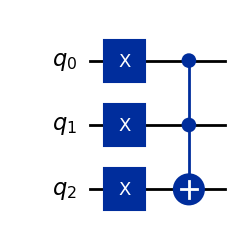

In [19]:
qc_ccx = QuantumCircuit(3, name = 'qc')

# to get the |111> state, since the intial default of qubit is |000>, we flip the qubits by applying X gate.
qc_ccx.x(0)
qc_ccx.x(1)
qc_ccx.x(2)
qc_ccx.ccx(0,1,2)
qc_ccx.draw('mpl')

### **Density Matrix Plot for $CCX$ gate**


Quantum state is:  Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


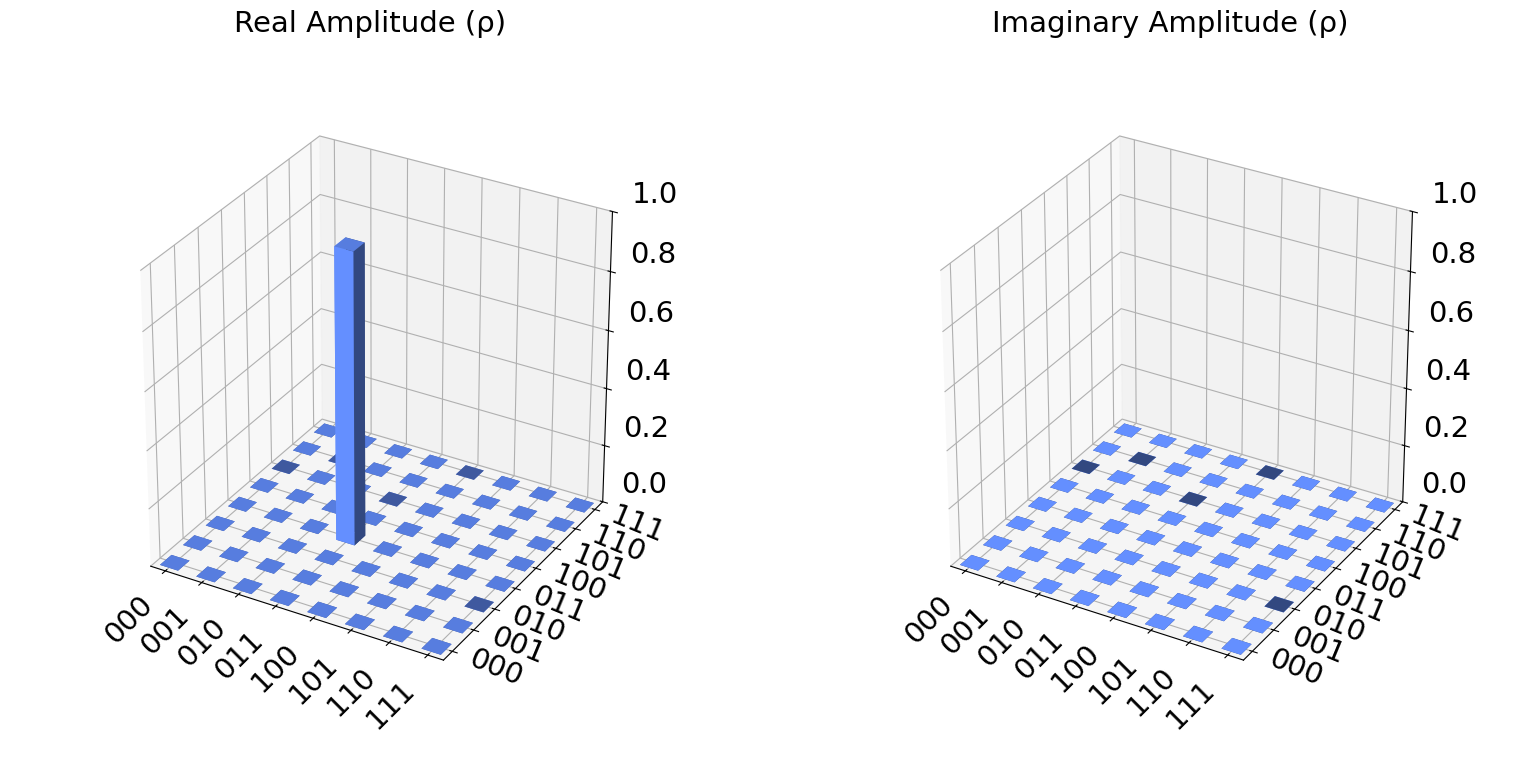

In [20]:
estimator = Aer.get_backend('statevector_simulator')

# run
job = estimator.run(qc_ccx)

# the final state after passing through the gates
psi = job.result().get_statevector(qc_ccx)

print('\nQuantum state is: ', psi)

plot_state_city(psi)

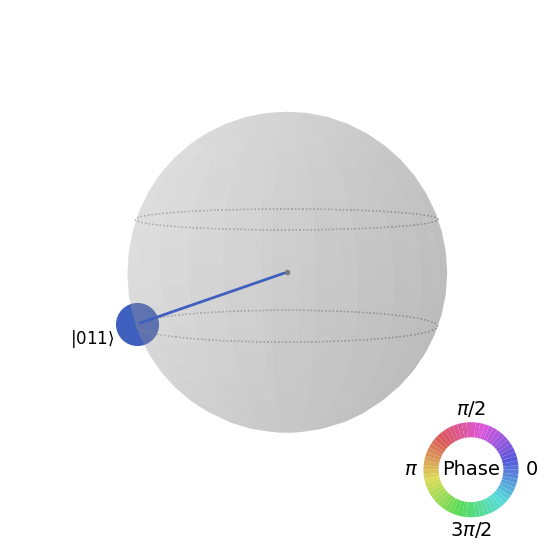

In [21]:
# visualize the statevector in qsphere
plot_state_qsphere(psi)

In [22]:
# initiate
estimator = Aer.get_backend('unitary_simulator')

# run
job = estimator.run(qc_ccx)

# result
job.result().get_unitary(qc_ccx , decimals = 3)


Operator([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


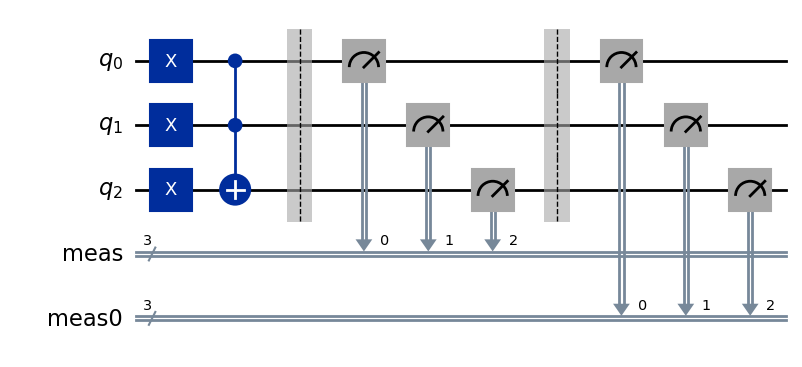

In [47]:
qc_ccx.measure_all()
qc_ccx.draw('mpl')

Total counts are: {'011 011': 1000}


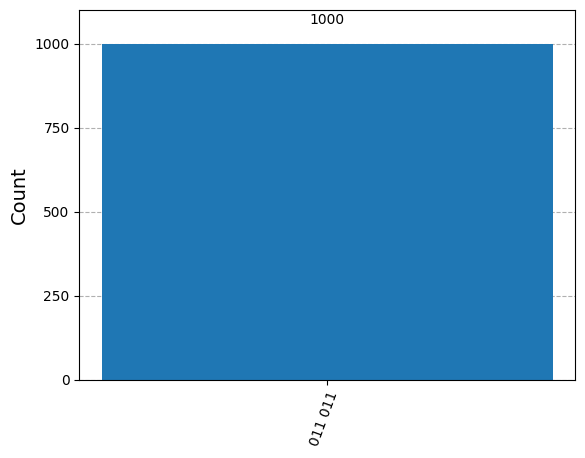

In [51]:
# initiate
estimator = Aer.get_backend('qasm_simulator')

# run
job = estimator.run(qc_ccx , shots = 1000)

# get the result fo 1000 times measurment
counts = job.result().get_counts(qc_ccx)
print("Total counts are:" , counts)

plot_histogram(counts)

## 2.2. Quantum CSWAP Gate

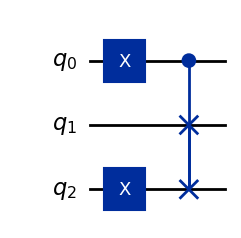

In [8]:
# initial stae is |101> and after passing through the cswap gate it will turn to |011>
qc_cswap = QuantumCircuit(3, name = 'qc')

qc_cswap.x(0)
qc_cswap.x(2)
qc_cswap.cswap(0,1,2)
qc_cswap.draw('mpl')

## **Density Matrix Plot for CSWAP Gate**


Quantum state is:  Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


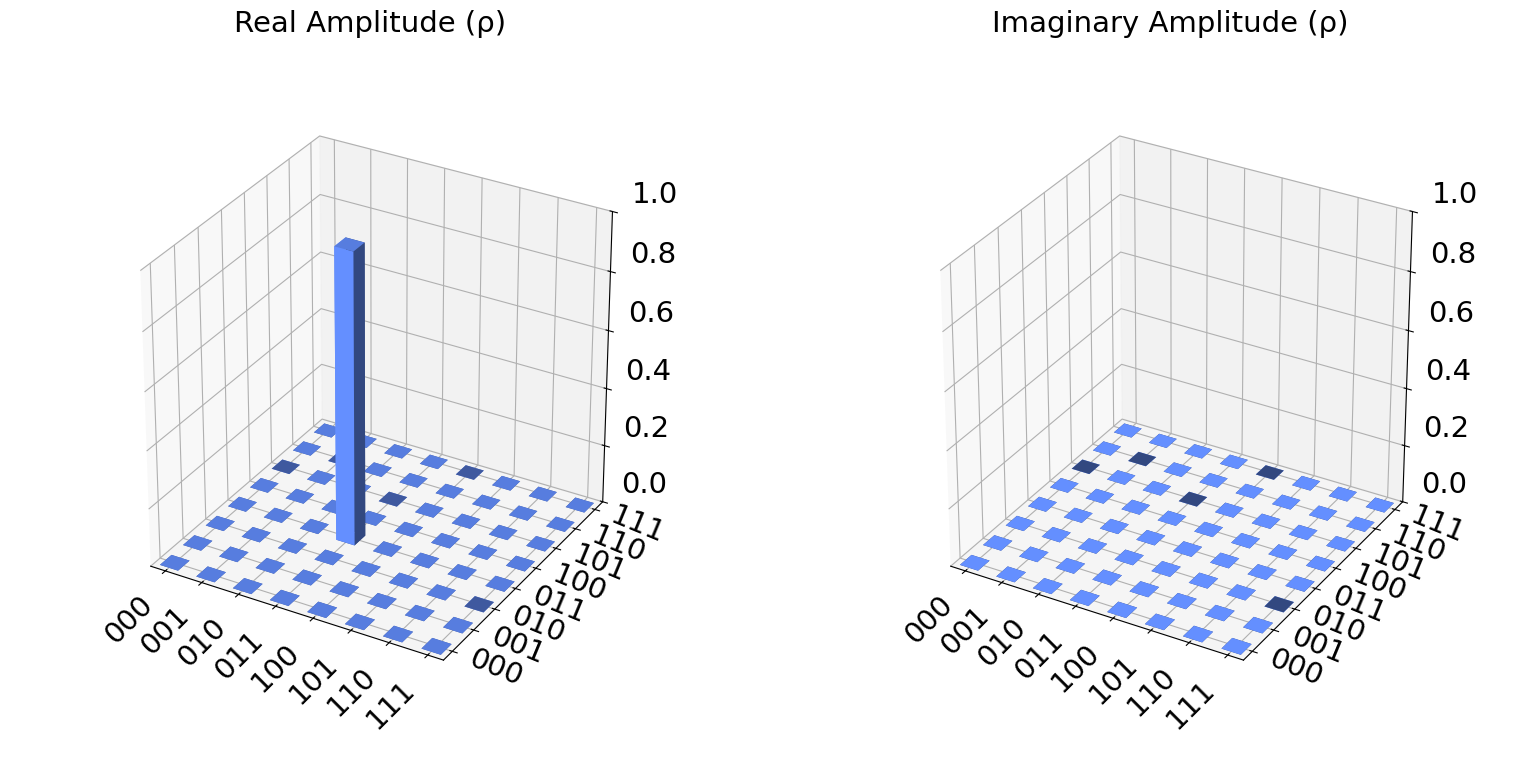

In [9]:
estimator = Aer.get_backend('statevector_simulator')

# run
job = estimator.run(qc_cswap)

# the final state after passing through the gates
psi = job.result().get_statevector(qc_cswap)

print('\nQuantum state is: ', psi)

plot_state_city(psi)

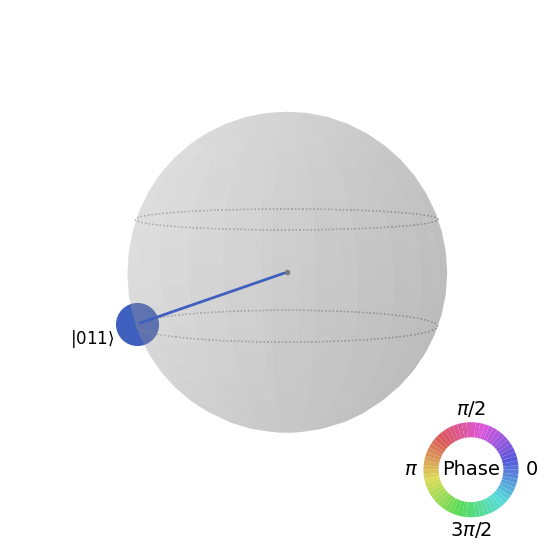

In [10]:
# visualize the statevector in qsphere
plot_state_qsphere(psi)

In [11]:
# initiate
estimator = Aer.get_backend('unitary_simulator')

# run
job = estimator.run(qc_cswap)

# result
job.result().get_unitary(qc_cswap)



Operator([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


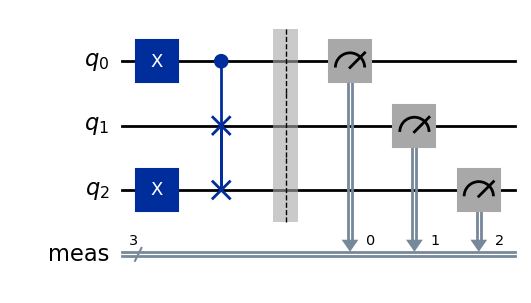

In [12]:
qc_cswap.measure_all()
qc_cswap.draw('mpl')

Total counts are: {'011': 1000}


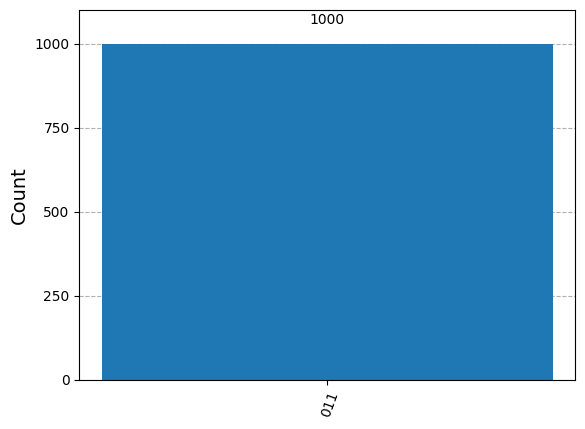

In [60]:
#initialize
estimator = Aer.get_backend("qasm_simulator")

# run
job = estimator.run(qc_cswap , shots = 1000)

# get the result fo 1000 times measurment
counts = job.result().get_counts(qc_cswap)

print("Total counts are:" , counts)

plot_histogram(counts)
